In [1]:
# It simply create a spreate region (margin) and allows some rate error to avoid over-fitting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df = pd.read_csv('mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

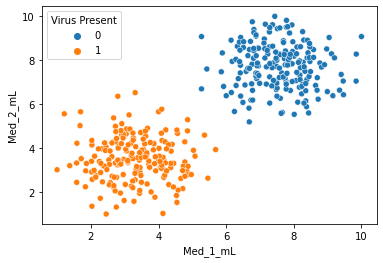

In [6]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

In [7]:
X = df.drop('Virus Present', axis=1)
y=df['Virus Present']

In [8]:
from sklearn.svm import SVC

In [9]:
model=SVC(kernel='linear',C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [10]:
# as C is bigger the number of points include in the margin area decrease
# as C is less more points will be allowed in the margin area  
# The penalty is a squared l2 penalty.

In [11]:
from svm_margin_plot import plot_svm_boundary

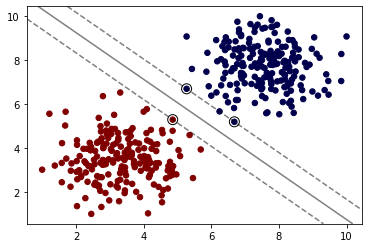

In [12]:
plot_svm_boundary(model,X,y)

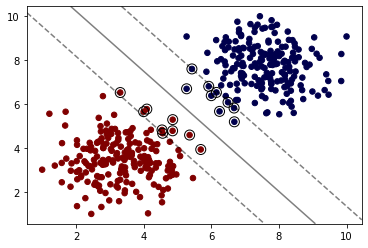

In [13]:
model=SVC(kernel='linear',C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

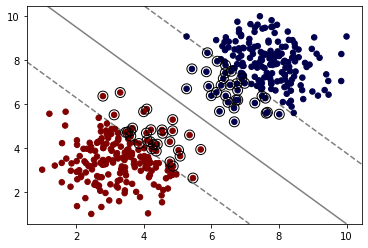

In [14]:
model=SVC(kernel='linear',C=0.005)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [15]:
# kernel is by default=’rbf’ , but can be changed  to {‘linear’, ‘poly’, ‘sigmoid’, ‘precomputed’}
#
# “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the -
# - data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to -
# - transformed to a linear equation in a higher number of dimension spaces.

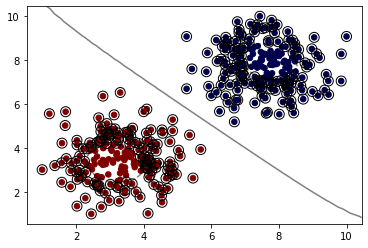

In [16]:
# changing kernel to (rbf : radio base frequancy)
model=SVC(kernel='rbf',C=0.01)
model.fit(X,y)
plot_svm_boundary(model,X,y)

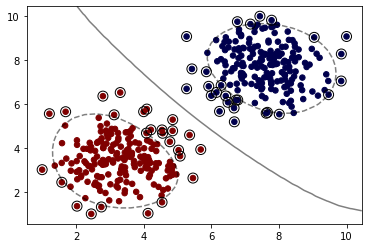

In [17]:
model=SVC(kernel='rbf',C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

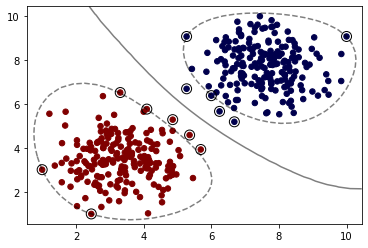

In [18]:
model=SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

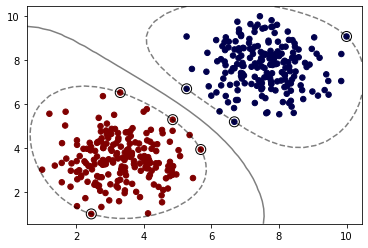

In [19]:
model=SVC(kernel='rbf',C=1000)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [20]:
# gamma is by default=’scale’ --- it can be either‘scale’,‘auto’ or float.
#
# the gamma parameter defines how far the influence of a single training example reaches,-
# - with low values meaning ‘far’ and high values meaning ‘close’.
#The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

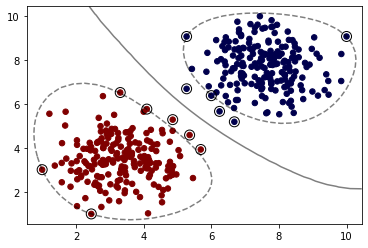

In [21]:
model=SVC(kernel='rbf',C=1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

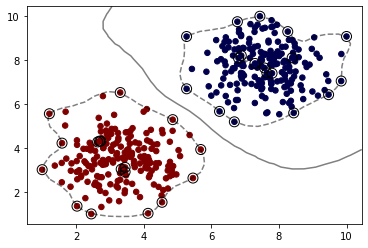

In [22]:
model=SVC(kernel='rbf',C=1000,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [23]:
# as gamma get bigger , more points (noise) will include 

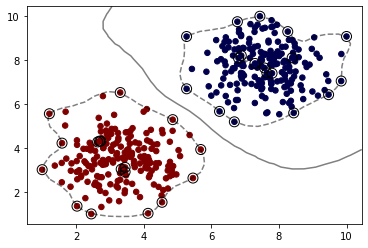

In [24]:
model=SVC(kernel='rbf',C=1000,gamma=0.5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

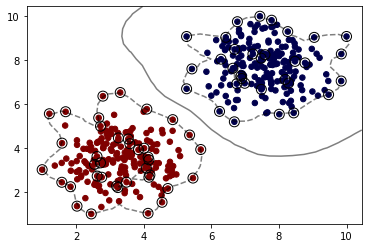

In [25]:
model=SVC(kernel='rbf',C=1000,gamma=0.9)
model.fit(X,y)
plot_svm_boundary(model,X,y)

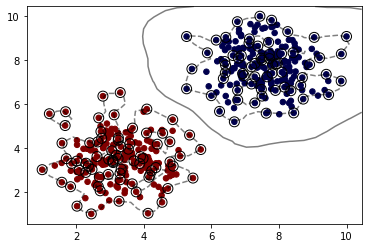

In [26]:
model=SVC(kernel='rbf',C=1000,gamma=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

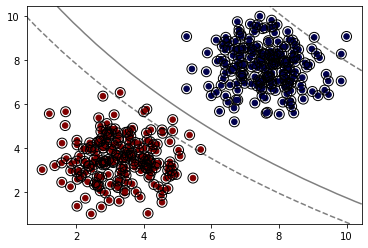

In [27]:
# By changing kernel to (sigmoid)
model=SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

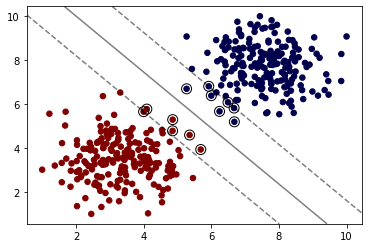

In [28]:
# By changing kernel to (poly)
model=SVC(kernel='poly', degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

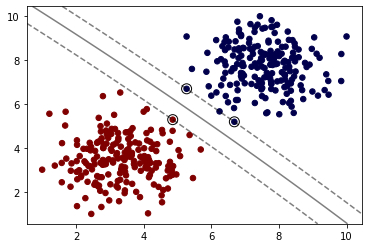

In [29]:
model=SVC(kernel='poly', degree=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

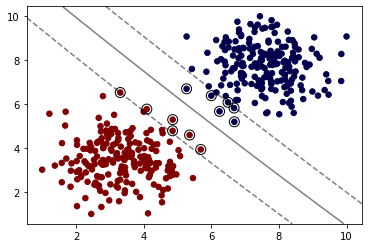

In [30]:
model=SVC(kernel='poly', degree=2, C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

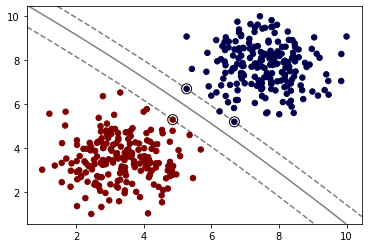

In [31]:
model=SVC(kernel='poly', degree=4, C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [32]:
# the best way to find-out the best parameters is by using grid search
from sklearn.model_selection import GridSearchCV

In [33]:
model=SVC()
param_grid={'C': [0.01,0.1,1,2], 'kernel':['linear','rbf','sigmoid','poly'] , 'degree':[1,2,3,4]}

In [34]:
grid = GridSearchCV(estimator= model ,param_grid=param_grid )

In [35]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [36]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'kernel': 'linear'}

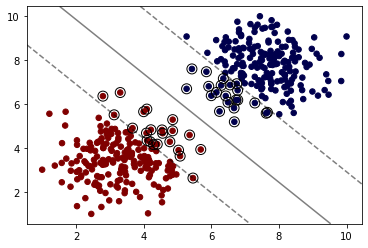

In [37]:
model=SVC(kernel='linear', C=0.01)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [ ]:
# Example 

In [38]:
dff = pd.read_csv('cement_slump.csv')

In [40]:
dff.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [41]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [42]:
y = dff['Compressive Strength (28-day)(Mpa)']

In [43]:
X = dff.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [44]:
from sklearn.model_selection import train_test_split 

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [62]:
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [63]:
from sklearn.svm import SVR 
modelsvr =SVR()

In [64]:
modelsvr.fit(X_train,y_train)

SVR()

In [65]:
pred = modelsvr.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [79]:
np.sqrt(mean_squared_error(y_test,pred))

6.695914838327133

In [68]:
mean_absolute_error(y_test,pred)

5.236902091259179

In [69]:
# using grid search 

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['linear','rbf','poly'], 'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto'], 'degree':[1,2,3,4]
              ,'epsilon':[0,0.01,0.1,0.5,1,2] }

# epsilonfloat, default=0.1
# Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss -
# - function with points predicted within a distance epsilon from the actual value.

In [72]:
grid=GridSearchCV(modelsvr , param_grid = param_grid)

In [73]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [1, 2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [75]:
grid.best_params_

{'C': 1, 'degree': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [76]:
gpred =grid.predict(X_test)

In [80]:
np.sqrt(mean_squared_error(y_test,gpred))

3.1782103051198347

In [ ]:
# before was 6.695914838327133

In [78]:
mean_absolute_error(y_test,gpred)

2.512801221076198

In [ ]:
# before was 5.236902091259179